## Predictions Maps - Voting Classifier Model

Team members: Mike Thisyamondal, Rajan Mamtani, Steven Trojanowski, Laura Roman
<br>Maps attributed to Laura Roman

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Import Voting Classificer Predictions (only columns needed to reduce file size)

In [2]:
data = pd.read_csv('./data/test_pred_vot_sm.csv')

In [3]:
data.shape

(116293, 6)

In [4]:
data['wnv_predict'].value_counts()

0.0    107304
1.0      8989
Name: wnv_predict, dtype: int64

In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
data.head()

,id,date,latitude,longitude,wnv_predict
0,1.0,2008-06-11,41.95469,-87.800991,0.0
1,2.0,2008-06-11,41.95469,-87.800991,0.0
2,3.0,2008-06-11,41.95469,-87.800991,0.0
3,4.0,2008-06-11,41.95469,-87.800991,0.0
4,5.0,2008-06-11,41.95469,-87.800991,0.0


In [7]:
from datetime import datetime

In [8]:
#data.dtypes

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data.set_index('date',inplace=True)

In [11]:
test_file = data.head()
test_file.to_csv('./data/test_predicts_et.csv')
test_file.to_csv('./data/test_predicts_vote.csv')

In [12]:
place = pd.DataFrame(data[['latitude','longitude','wnv_predict']])

place['wnv_predict'].value_counts()
place['year'] = place.index.year

In [13]:
place.head()

,latitude,longitude,wnv_predict,year
date,,,,
2008-06-11,41.95469,-87.800991,0.0,2008
2008-06-11,41.95469,-87.800991,0.0,2008
2008-06-11,41.95469,-87.800991,0.0,2008
2008-06-11,41.95469,-87.800991,0.0,2008
2008-06-11,41.95469,-87.800991,0.0,2008


West Nile Virus Positive Filter

In [14]:
wnv_pos = place['wnv_predict']==1

In [15]:
place_wnv = place[wnv_pos]

In [16]:
place_wnv.index.year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', name='date', length=8989)

In [17]:
uniq=place_wnv.groupby(['latitude','longitude','year'],as_index=False).sum()
uniq.head(30)

,latitude,longitude,year,wnv_predict
0,41.644612,-87.604498,2008,16.0
1,41.644612,-87.604498,2010,18.0
2,41.644612,-87.604498,2012,23.0
3,41.644612,-87.604498,2014,8.0
4,41.646541,-87.543762,2008,17.0
5,41.646541,-87.543762,2010,19.0
6,41.646541,-87.543762,2012,23.0
7,41.646541,-87.543762,2014,8.0
8,41.659112,-87.538693,2008,26.0
9,41.659112,-87.538693,2010,30.0


In [18]:
uniq[uniq['year']==2014].sort_values("wnv_predict",ascending=False)

,latitude,longitude,year,wnv_predict
411,41.974689,-87.890615,2014,78.0
371,41.954690,-87.800991,2014,40.0
342,41.944869,-87.832763,2014,30.0
403,41.973845,-87.805059,2014,25.0
440,41.992478,-87.862995,2014,20.0
379,41.957799,-87.930995,2014,19.0
407,41.974089,-87.824812,2014,19.0
458,42.009876,-87.807277,2014,19.0
454,42.008314,-87.777921,2014,19.0
462,42.011601,-87.811506,2014,18.0


In [19]:
top_5_voting= uniq[uniq['year']==2014].sort_values("wnv_predict",ascending=False)
top_5_voting.shape

(107, 4)

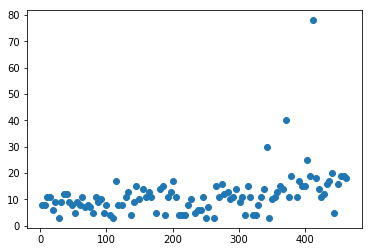

In [20]:
plt.scatter(top_5_voting.index, top_5_voting['wnv_predict'])

/Users/Roman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


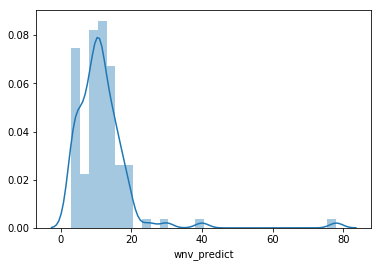

In [21]:
sns.distplot(top_5_voting['wnv_predict'])

In [22]:
uniq[uniq['year']==2008]['latitude'][0:5]

0     41.644612
4     41.646541
8     41.659112
12    41.662014
16    41.673408
Name: latitude, dtype: float64

In [23]:
uniq['wnv_predict'].min(),uniq['wnv_predict'].max()

(1.0, 131.0)

In [24]:
wnv_lat = uniq[uniq['year']==2008]['latitude'].values
wnv_long = uniq[uniq['year']==2008]['longitude'].values

In [25]:
wnv_lat = uniq[uniq['year']==2009]['latitude'].values
wnv_long = uniq[uniq['year']==2009]['longitude'].values

In [26]:
data.index.max(),data.index.min()

(Timestamp('2014-10-02 00:00:00'), Timestamp('2008-06-11 00:00:00'))

In [27]:
from bokeh.io import output_notebook, show
output_notebook()
import os
from bokeh.models import GMapOptions
from bokeh.plotting import gmap
from bokeh.models import LinearInterpolator

Loading BokehJS ...

### WNV Positive mosquito volume weighted location maps, by year 2008-2014

In [28]:
map_options = GMapOptions(lat=41.8781, lng=-87.6298, map_type="roadmap", zoom=10)

# Replace the value below with your personal API key:
api_key = "Google API Key"

size_mapper = LinearInterpolator(x=[uniq['wnv_predict'].min(),uniq['wnv_predict'].max()],
                                y=[1,135])
p = gmap(api_key, map_options, title="Chicago 2008 West Nile Virus Predictions")

data = dict(lat=uniq[uniq['year']==2008]['latitude'].values,
          lon=uniq[uniq['year']==2008]['longitude'].values,
           wnv_predict=uniq[uniq['year']==2008]['wnv_predict'])


p.circle(x="lon", y="lat", fill_color="gold", fill_alpha=0.8, source=data,
         size={'field':'wnv_predict','transform':size_mapper})

show(p)

In [29]:
map_options = GMapOptions(lat=41.8781, lng=-87.6298, map_type="roadmap", zoom=10)

# Replace the value below with your personal API key:
api_key = "Google API Key"

size_mapper = LinearInterpolator(x=[uniq['wnv_predict'].min(),uniq['wnv_predict'].max()],
                                y=[1,135])
p = gmap(api_key, map_options, title="Chicago 2010 West Nile Virus Predictions")

data = dict(lat=uniq[uniq['year']==2010]['latitude'].values,
          lon=uniq[uniq['year']==2010]['longitude'].values,
           wnv_predict=uniq[uniq['year']==2010]['wnv_predict'])


p.circle(x="lon", y="lat", fill_color="orange", fill_alpha=0.8, source=data,
         size={'field':'wnv_predict','transform':size_mapper})

show(p)

In [30]:
map_options = GMapOptions(lat=41.8781, lng=-87.6298, map_type="roadmap", zoom=10)

# Replace the value below with your personal API key:
api_key = "Google API Key"

size_mapper = LinearInterpolator(x=[uniq['wnv_predict'].min(),uniq['wnv_predict'].max()],
                                y=[1,135])
p = gmap(api_key, map_options, title="Chicago 2012 West Nile Virus Predictions")

data = dict(lat=uniq[uniq['year']==2012]['latitude'].values,
          lon=uniq[uniq['year']==2012]['longitude'].values,
           wnv_predict=uniq[uniq['year']==2012]['wnv_predict'])


p.circle(x="lon", y="lat", fill_color="coral", fill_alpha=0.8, source=data,
         size={'field':'wnv_predict','transform':size_mapper})

show(p)

In [31]:
map_options = GMapOptions(lat=41.8781, lng=-87.6298, map_type="roadmap", zoom=10)

# Replace the value below with your personal API key:
api_key = "Google API Key"

size_mapper = LinearInterpolator(x=[uniq['wnv_predict'].min(),uniq['wnv_predict'].max()],
                                y=[1,135])
p = gmap(api_key, map_options, title="Chicago 2014 West Nile Virus Predictions")

data = dict(lat=uniq[uniq['year']==2014]['latitude'].values,
          lon=uniq[uniq['year']==2014]['longitude'].values,
           wnv_predict=uniq[uniq['year']==2014]['wnv_predict'])


p.circle(x="lon", y="lat", fill_color="indianred", fill_alpha=0.8, source=data,
         size={'field':'wnv_predict','transform':size_mapper})

show(p)